In [1]:
# Import packages
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt

In [2]:
# Load datasets
df = pd.read_excel('Dokumenter\ChildrenWristFeaturesV2_TSF_new.xlsx')
df.fillna(df.mean(), inplace=True)

In [3]:
# Initialize features and targets/labels
X = df.iloc[:, 2:32]
Y = df.iloc[:, 32]

# Binarize the output
#Y = label_binarize(Y, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12])
#n_classes = Y.shape[1]

# Splits datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing, scaling datasets/standardization
scal_data = StandardScaler()
X_train = scal_data.fit_transform(X_train)
X_test = scal_data.transform(X_test)

# DecisionTree

In [4]:
# Quality of a split
criterion = ['entropy']               
# Strategy used to split at each node
splitter = ['best']                   
# Number of features to consider at every split
max_features = [30]                   
# Maximum depth
max_depth = [350]

# Dictionary to store the hyperparameters
param_grid_dt = { 'criterion': criterion,
               'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth}

# Base model
dt = DecisionTreeClassifier(random_state=42) # random_state=42

In [5]:
# Search for best parameter values
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=2)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)
print(dt_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  17.2s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s remaining:    0.0s


[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  15.6s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  14.8s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  15.1s
[CV] criterion=entropy, max_depth=350, max_features=30, splitter=best 
[CV]  criterion=entropy, max_depth=350, max_features=30, splitter=best, total=  16.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


{'criterion': 'entropy', 'max_depth': 350, 'max_features': 30, 'splitter': 'best'}
0.6333400183191789


Feature: 0, Score: 0.04626
Feature: 1, Score: 0.02887
Feature: 2, Score: 0.04166
Feature: 3, Score: 0.04283
Feature: 4, Score: 0.02518
Feature: 5, Score: 0.03288
Feature: 6, Score: 0.05758
Feature: 7, Score: 0.04592
Feature: 8, Score: 0.04105
Feature: 9, Score: 0.03341
Feature: 10, Score: 0.11322
Feature: 11, Score: 0.04455
Feature: 12, Score: 0.00856
Feature: 13, Score: 0.02555
Feature: 14, Score: 0.04800
Feature: 15, Score: 0.01381
Feature: 16, Score: 0.03013
Feature: 17, Score: 0.01685
Feature: 18, Score: 0.01609
Feature: 19, Score: 0.14510
Feature: 20, Score: 0.02150
Feature: 21, Score: 0.03201
Feature: 22, Score: 0.00332
Feature: 23, Score: 0.01021
Feature: 24, Score: 0.01271
Feature: 25, Score: 0.01826
Feature: 26, Score: 0.01031
Feature: 27, Score: 0.01198
Feature: 28, Score: 0.01033
Feature: 29, Score: 0.01190


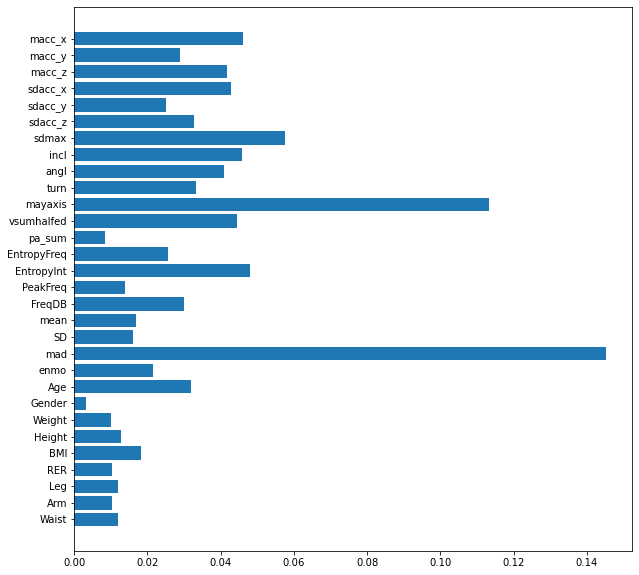

In [6]:
# Analyze features using feature importance
importance_dt = dt_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), dt_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [7]:
# Retrain with feature selection
df_features = df.iloc[:, 2:32]
X_new_dt = df_features.iloc[:, importance_dt>=0.015]
X_train_new_dt, X_test_new_dt, y_train_new_dt, y_test_new_dt = train_test_split(X_new_dt, Y, test_size=0.2, random_state=42)
dt_stack = DecisionTreeClassifier(criterion='entropy', max_features=21, max_depth=350, random_state=42)
dt_stack.fit(X_train_new_dt, y_train_new_dt)
print("Train accuracy: ", dt_stack.score(X_train_new_dt, y_train_new_dt))
print("Test accuracy: ", dt_stack.score(X_test_new_dt, y_test_new_dt))

Train accuracy:  1.0
Test accuracy:  0.6410669203468589


# KNN

In [8]:
knn_stack = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, p=1, weights='distance')
knn_stack.fit(X_train, y_train)
print("Train accuracy: ", knn_stack.score(X_train, y_train))
print("Test accuracy: ", knn_stack.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.6787530642859756


# RandomForest

In [13]:
# Number of trees
n_estimators = [50]     #490 too long to compute ---> EXCEPT FOR THIS ONE AS I ALSO DID IT BEFORE (Nevermind, it didn't worked)
# Number of features to consider at every split
max_features = [22]

# Dictionary to store the hyperparameters
param_grid_rf = { 'n_estimators': n_estimators,
                  'max_features': max_features}

# Base model
rf = RandomForestClassifier(random_state=42)                 # random_state=42

In [14]:
# Search for best parameter values
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 2.3min
[CV] max_features=22, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] ................. max_features=22, n_estimators=50, total= 1.8min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 1.8min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 1.8min
[CV] max_features=22, n_estimators=50 ................................
[CV] ................. max_features=22, n_estimators=50, total= 1.9min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.5min finished


{'max_features': 22, 'n_estimators': 50}
0.7369421969409633


Feature: 0, Score: 0.05298
Feature: 1, Score: 0.04194
Feature: 2, Score: 0.05054
Feature: 3, Score: 0.03783
Feature: 4, Score: 0.03265
Feature: 5, Score: 0.04016
Feature: 6, Score: 0.03166
Feature: 7, Score: 0.05544
Feature: 8, Score: 0.04652
Feature: 9, Score: 0.04204
Feature: 10, Score: 0.10815
Feature: 11, Score: 0.05178
Feature: 12, Score: 0.03510
Feature: 13, Score: 0.04146
Feature: 14, Score: 0.04279
Feature: 15, Score: 0.01626
Feature: 16, Score: 0.03078
Feature: 17, Score: 0.02982
Feature: 18, Score: 0.02368
Feature: 19, Score: 0.03610
Feature: 20, Score: 0.02899
Feature: 21, Score: 0.02274
Feature: 22, Score: 0.00530
Feature: 23, Score: 0.01090
Feature: 24, Score: 0.01511
Feature: 25, Score: 0.01805
Feature: 26, Score: 0.01178
Feature: 27, Score: 0.01364
Feature: 28, Score: 0.01132
Feature: 29, Score: 0.01449


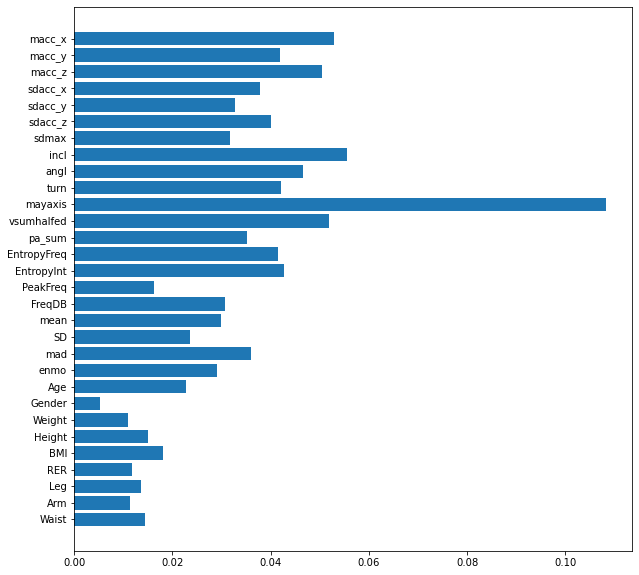

In [15]:
# Analyze features using feature importance
importance_rf = rf_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), rf_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [16]:
# Retrain with feature selection
df_features = df.iloc[:, 2:32]
X_new_rf = df_features.iloc[:, importance_rf>=0.02]
X_train_new_rf, X_test_new_rf, y_train_new_rf, y_test_new_rf = train_test_split(X_new_rf, Y, test_size=0.2, random_state=42)
rf_stack = RandomForestClassifier(n_estimators=50, max_features=21, random_state=42)
rf_stack.fit(X_train_new_rf, y_train_new_rf)
print(rf_stack.score(X_train_new_rf, y_train_new_rf))
print(rf_stack.score(X_test_new_rf, y_test_new_rf))

0.9999451162620515
0.731111192418865


# XGBoost

In [17]:
# Number of boosting rounds
n_estimators = [15]
# Maximum tree depth
max_depth = [15]
# Boosting learning rate
learning_rate  = [0.1]
# Number of samples used to fit each tree
subsample = [1.0]
# Number of features used to fit each tree
colsample_bytree = [1.0]

# Dictionary to store the hyperparameters
param_grid_xgb = { 'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'learning_rate': learning_rate,
                   'subsample': subsample,
                   'colsample_bytree': colsample_bytree}

# Base model
xgb = XGBClassifier(use_label_encoder='false', random_state=42) # random_state=42

In [18]:
# Search for best parameter values
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, verbose=2)
xgb_grid.fit(X_train, y_train)  #y_train[:, 0]
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 2.7min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[18:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 1.9min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0 
[18:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators=15, subsample=1.0, total= 1.9min
[CV] colsample_bytree=1.0, learning_rate=0.1, max_depth=15, n_estimators

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 10.2min finished


[18:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 15, 'subsample': 1.0}
0.7217028117772557


Feature: 0, Score: 0.02888
Feature: 1, Score: 0.02056
Feature: 2, Score: 0.02926
Feature: 3, Score: 0.05857
Feature: 4, Score: 0.02183
Feature: 5, Score: 0.02466
Feature: 6, Score: 0.02398
Feature: 7, Score: 0.04104
Feature: 8, Score: 0.04115
Feature: 9, Score: 0.02559
Feature: 10, Score: 0.03481
Feature: 11, Score: 0.02922
Feature: 12, Score: 0.06793
Feature: 13, Score: 0.06303
Feature: 14, Score: 0.04825
Feature: 15, Score: 0.01778
Feature: 16, Score: 0.03564
Feature: 17, Score: 0.02427
Feature: 18, Score: 0.02114
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.05558
Feature: 22, Score: 0.03793
Feature: 23, Score: 0.03997
Feature: 24, Score: 0.04273
Feature: 25, Score: 0.04066
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.04022
Feature: 28, Score: 0.03836
Feature: 29, Score: 0.04693


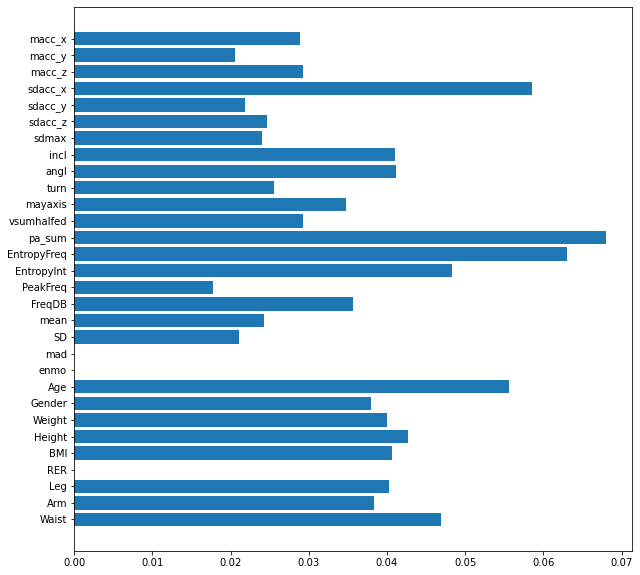

In [19]:
# Analyze features using feature importance
importance_xgb = xgb_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(30, 0, -1), xgb_grid.best_estimator_.feature_importances_[0:30])
plt.yticks(range(30, 0, -1), df.columns.tolist()[2:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

In [20]:
# Retrain with feature selection
df_features = df.iloc[:, 2:32]
X_new_xgb = df_features.iloc[:, importance_xgb>=0.03]
X_train_new_xgb, X_test_new_xgb, y_train_new_xgb, y_test_new_xgb = train_test_split(X_new_xgb, Y, test_size=0.2, random_state=42)
xgb_stack = XGBClassifier(learning_rate=0.1, max_depth=15, n_estimators=15, colsample_bytree=1.0, subsample=1.0, random_state=42)
xgb_stack.fit(X_train_new_xgb, y_train_new_xgb)
print("Train accuracy: ", xgb_stack.score(X_train_new_xgb, y_train_new_xgb))
print("Test accuracy: ", xgb_stack.score(X_test_new_xgb, y_test_new_xgb))

[19:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Train accuracy:  0.9094235378057481
Test accuracy:  0.7265010427719439


# Stacking

In [21]:
%%time
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Define the base models
estimators  = list()
estimators.append(('dt', dt_stack))
estimators.append(('knn', knn_stack))
estimators.append(('rf', rf_stack))
estimators.append(('xgb', xgb_stack))
# Define meta learner model
final_estimator = ExtraTreesClassifier(random_state=42) # OneVsRestClassifier, GaussianNB(naive_bayes), ExtraTreesClassifier
# Define the stacking ensemble
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
# Fit the model on all available data
#X_train_new_st, X_test_new_st, y_train_new_st, y_test_new_st = train_test_split(X, Y, test_size=0.2, random_state=42)
stack.fit(X_train, y_train)
print("Train accuracy: ", stack.score(X_train, y_train))
print("Test accuracy: ", stack.score(X_test, y_test))

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:23:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Train accuracy:  0.9990486818755603


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Test accuracy:  0.7549302989279573
Wall time: 31min 12s
Compiler : 197 ms
Parser   : 357 ms


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
pred_train_stack = stack.predict(X_train)
pred_test_stack = stack.predict(X_test)
print("---------------Confusion Matrix---------------")
print(confusion_matrix(y_test, pred_test_stack))
print("---------------Classification report - train---------------")
print(classification_report(y_train, pred_train_stack))
print("---------------Classification report - test---------------")
print(classification_report(y_test, pred_test_stack))

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


---------------Confusion Matrix---------------
[[ 1377    22     1     0     0     0     0     0     3    12   235]
 [   26  1411    25     0     0     0     1     2     1     8   171]
 [   10    21  1365     5     0     4     4     0     2     1   252]
 [    0     0     2  1127   125     5    10     0     2     0   407]
 [    0     0     1   115  1113    79    23     0    21     0   299]
 [    1     0     9    12    68  1221    25     1    24     0   327]
 [    1     2     4    14    22    13   740     5    96     3   779]
 [    1     1     0     3     2     4    13  1226     8     0   418]
 [    1     0     0     5    37    28    75     1   426     4   490]
 [   10     6     5     0     0     0     2     0     1   542   185]
 [  106   132   169   282   283   229   315   348   178    55 10085]]
---------------Classification report - train---------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6750
           2       0.99 

C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Confusion matrix, without normalization
[[ 1377    22     1     0     0     0     0     0     3    12   235]
 [   26  1411    25     0     0     0     1     2     1     8   171]
 [   10    21  1365     5     0     4     4     0     2     1   252]
 [    0     0     2  1127   125     5    10     0     2     0   407]
 [    0     0     1   115  1113    79    23     0    21     0   299]
 [    1     0     9    12    68  1221    25     1    24     0   327]
 [    1     2     4    14    22    13   740     5    96     3   779]
 [    1     1     0     3     2     4    13  1226     8     0   418]
 [    1     0     0     5    37    28    75     1   426     4   490]
 [   10     6     5     0     0     0     2     0     1   542   185]
 [  106   132   169   282   283   229   315   348   178    55 10085]]


C:\Anaconda\envs\Classification\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Normalized confusion matrix
[[8.34545455e-01 1.33333333e-02 6.06060606e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.81818182e-03 7.27272727e-03 1.42424242e-01]
 [1.58054711e-02 8.57750760e-01 1.51975684e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.07902736e-04 1.21580547e-03
  6.07902736e-04 4.86322188e-03 1.03951368e-01]
 [6.00961538e-03 1.26201923e-02 8.20312500e-01 3.00480769e-03
  0.00000000e+00 2.40384615e-03 2.40384615e-03 0.00000000e+00
  1.20192308e-03 6.00961538e-04 1.51442308e-01]
 [0.00000000e+00 0.00000000e+00 1.19189511e-03 6.71632896e-01
  7.44934446e-02 2.97973778e-03 5.95947557e-03 0.00000000e+00
  1.19189511e-03 0.00000000e+00 2.42550656e-01]
 [0.00000000e+00 0.00000000e+00 6.05693519e-04 6.96547547e-02
  6.74136887e-01 4.78497880e-02 1.39309509e-02 0.00000000e+00
  1.27195639e-02 0.00000000e+00 1.81102362e-01]
 [5.92417062e-04 0.00000000e+00 5.33175355e-03 7.10900474e-03
  4.02843602e-02 7.23341232e-01 1.48104265e-02 5.9

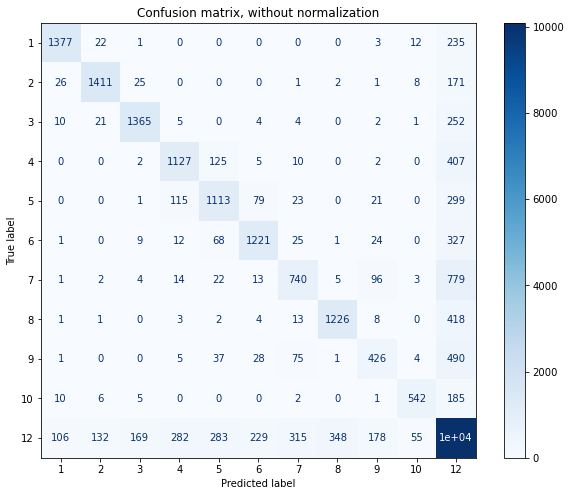

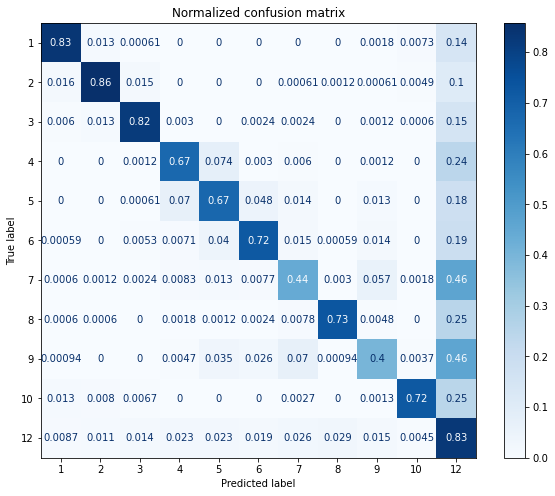

In [22]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    # Change figure size
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = plot_confusion_matrix(stack, X_test, y_test,
                                 display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, ax=ax)
    
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
plt.show()